<a href="https://colab.research.google.com/github/thayyilakul/Tensorflow-ML/blob/main/Pizza_steak_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2024-12-11 10:51:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.4’

pizza_steak.zip.4   100%[===================>] 104.47M   142MB/s    in 0.7s    

2024-12-11 10:51:52 (142 MB/s) - ‘pizza_steak.zip.4’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [7]:
!ls pizza_steak/test

pizza  steak


In [8]:
!ls pizza_steak/test/pizza

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [9]:
!ls pizza_steak/test/steak

100274.jpg   148595.jpg   2138503.jpg  2752603.jpg  3173402.jpg  3873655.jpg  66858.jpg
1012080.jpg  1498778.jpg  2144308.jpg  2756200.jpg  321090.jpg	 3901703.jpg  670345.jpg
1016217.jpg  1499273.jpg  219196.jpg   2772358.jpg  3235645.jpg  3903517.jpg  673127.jpg
1064847.jpg  1515274.jpg  2193535.jpg  277297.jpg   324862.jpg	 3905395.jpg  690177.jpg
1082384.jpg  1523026.jpg  2198931.jpg  2802460.jpg  3293212.jpg  391144.jpg   690477.jpg
108310.jpg   1627703.jpg  221604.jpg   2814314.jpg  3293650.jpg  39461.jpg    697562.jpg
1094883.jpg  1653815.jpg  2229090.jpg  281731.jpg   3297938.jpg  399377.jpg   7056.jpg
1107549.jpg  1655387.jpg  2246332.jpg  2821155.jpg  3315737.jpg  400530.jpg   717293.jpg
1118585.jpg  1662212.jpg  2276476.jpg  2824517.jpg  3343970.jpg  400951.jpg   721500.jpg
1163050.jpg  168551.jpg   2285106.jpg  2825105.jpg  3352834.jpg  401660.jpg   730464.jpg
1166047.jpg  1687010.jpg  228683.jpg   284097.jpg   3383942.jpg  40947.jpg    746921.jpg
1190808.jpg  1718949.jpg  

In [10]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [11]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [12]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [13]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape : {img.shape}')
  return img

Image shape : (512, 384, 3)


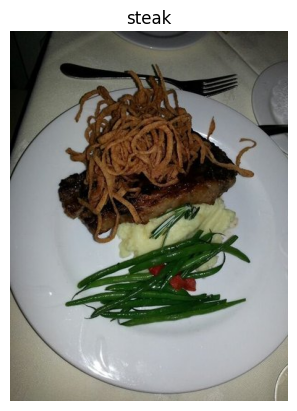

In [14]:
img = view_random_image('pizza_steak/train/','steak')

array([[[  8,   8,   6],
        [  6,   6,   4],
        [  2,   4,   1],
        ...,
        [ 46,  43,  34],
        [ 47,  43,  34],
        [ 46,  42,  33]],

       [[  4,   4,   2],
        [  4,   4,   2],
        [  2,   4,   1],
        ...,
        [ 50,  47,  38],
        [ 50,  46,  37],
        [ 49,  45,  36]],

       [[  2,   2,   0],
        [  4,   4,   2],
        [  4,   6,   3],
        ...,
        [ 50,  47,  38],
        [ 49,  46,  37],
        [ 48,  45,  36]],

       ...,

       [[104,  99,  80],
        [107, 102,  83],
        [108, 102,  86],
        ...,
        [129, 127, 106],
        [129, 127, 106],
        [129, 127, 106]],

       [[110, 105,  86],
        [107, 102,  83],
        [106, 100,  84],
        ...,
        [128, 126, 105],
        [128, 127, 106],
        [129, 128, 107]],

       [[106, 101,  82],
        [100,  95,  76],
        [100,  94,  78],
        ...,
        [125, 123, 102],
        [123, 122, 101],
        [123, 122, 101]]], dtype=uint8)
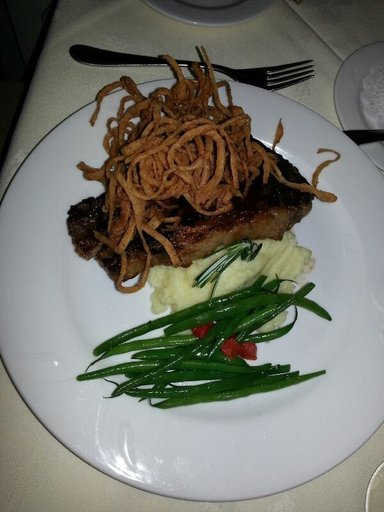

In [15]:
img

In [16]:
img.shape

(512, 384, 3)

In [17]:
img.min(), img.max()

(0, 255)

In [18]:
img / 255.

array([[[0.03137255, 0.03137255, 0.02352941],
        [0.02352941, 0.02352941, 0.01568627],
        [0.00784314, 0.01568627, 0.00392157],
        ...,
        [0.18039216, 0.16862745, 0.13333333],
        [0.18431373, 0.16862745, 0.13333333],
        [0.18039216, 0.16470588, 0.12941176]],

       [[0.01568627, 0.01568627, 0.00784314],
        [0.01568627, 0.01568627, 0.00784314],
        [0.00784314, 0.01568627, 0.00392157],
        ...,
        [0.19607843, 0.18431373, 0.14901961],
        [0.19607843, 0.18039216, 0.14509804],
        [0.19215686, 0.17647059, 0.14117647]],

       [[0.00784314, 0.00784314, 0.        ],
        [0.01568627, 0.01568627, 0.00784314],
        [0.01568627, 0.02352941, 0.01176471],
        ...,
        [0.19607843, 0.18431373, 0.14901961],
        [0.19215686, 0.18039216, 0.14509804],
        [0.18823529, 0.17647059, 0.14117647]],

       ...,

       [[0.40784314, 0.38823529, 0.31372549],
        [0.41960784, 0.4       , 0.3254902 ],
        [0.42352941, 0

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (244, 244), class_mode = 'binary', seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir, batch_size = 32, target_size = (244, 244), class_mode = 'binary', seed = 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size = 3,activation = 'relu',input_shape = (244, 244, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile our CNN
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

import math

history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = math.ceil(len(train_data)/32), validation_data = valid_data, validation_steps = math.ceil(len(valid_data)/32))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 8s/step - accuracy: 0.5625 - loss: 0.6986 - val_accuracy: 0.3750 - val_loss: 0.7176
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.4896 - loss: 0.6792 - val_accuracy: 0.3438 - val_loss: 0.7123
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.6042 - loss: 0.6880 - val_accuracy: 0.4375 - val_loss: 0.7479
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4896 - loss: 0.7117 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5208 - loss: 0.6851 - val_accuracy: 0.5938 - val_loss: 0.6709


In [20]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 242, 242, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 240, 240, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 120, 120, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 118, 118, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 116, 116, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 58, 58, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33640)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          33,641 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,955 (429.52 KB)

 Trainable params: 36,651 (143.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,304 (286.35 KB)

Image shape : (512, 512, 3)
Image shape : (384, 512, 3)


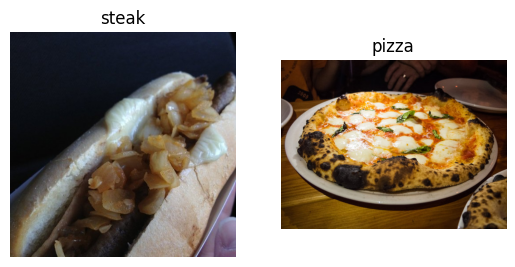

In [21]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [22]:
train_dir, test_dir

('pizza_steak/train', 'pizza_steak/test')

In [23]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             batch_size = 32,
                                             target_size = (224, 224),
                                             class_mode = 'binary',
                                             seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [27]:
images[0], images[0].shape

(array([[[0.42352945, 0.43137258, 0.34509805],
         [0.3137255 , 0.32941177, 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34509805, 0.3803922 ],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],
 
        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.38431376],
         [0.39607847, 0.34901962, 0.3647059 ]],
 
        [[0.3647059 , 0.40000004, 0.29411766],
         [0.38823533, 0.42352945, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.30980393],
         [0.30980393, 0.29803923, 0.2784314 ],
         [0.3372549 , 0.3254902 , 0.30588236]],
 
        ...,
 
        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509

In [28]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Input

In [30]:
model_4 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    # MaxPool2D(pool_size = 2, padding = 'valid'),
    Conv2D(10, 3, activation = 'relu'),
    # MaxPool2D(2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [31]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [32]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
len(train_data), len(test_data)

(47, 16)

In [34]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = math.ceil(len(train_data) / 32),
                        validation_data = test_data,
                        validation_steps = math.ceil(len(test_data) / 32))

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.5625 - loss: 3.0233 - val_accuracy: 0.3750 - val_loss: 3.0904
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.4792 - loss: 2.2420 - val_accuracy: 0.3438 - val_loss: 1.4793
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.6250 - loss: 0.9804 - val_accuracy: 0.5938 - val_loss: 0.9424
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5417 - loss: 0.9626 - val_accuracy: 0.5938 - val_loss: 0.7270
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5521 - loss: 0.7856 - val_accuracy: 0.6562 - val_loss: 0.5275


<Axes: >

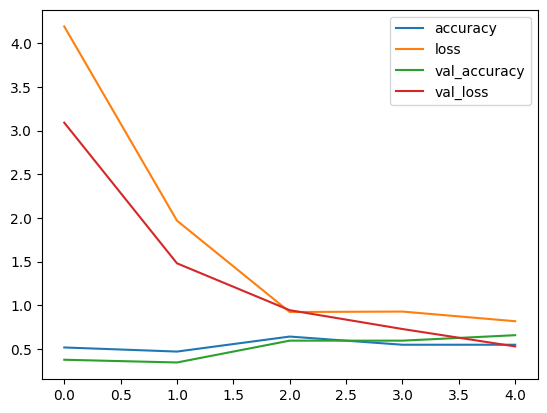

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [36]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'Training Loss')
  plt.plot(epochs, val_loss, label = 'Val Loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = 'Training accuracy')
  plt.plot(epochs, val_accuracy, label = 'Val accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()

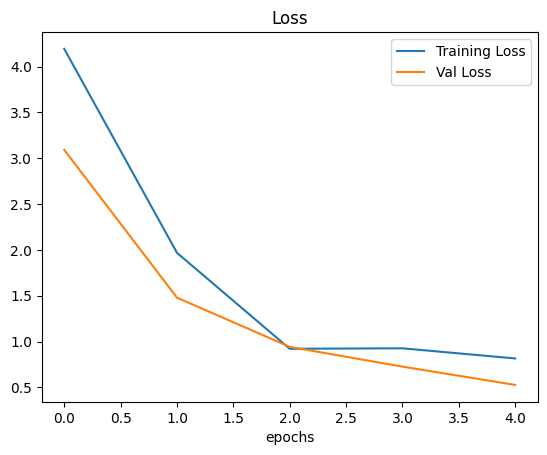

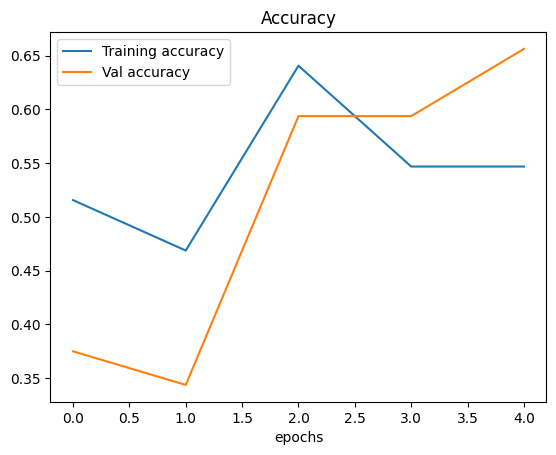

In [38]:
plot_loss_curves(history_4)

In [40]:
model_5 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [41]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [43]:
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = math.ceil(len(train_data) / 32),
            validation_data = test_data,
            validation_steps = math.ceil(len(test_data) / 32))

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4583 - loss: 0.7016 - val_accuracy: 0.5938 - val_loss: 0.6390
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.4271 - loss: 0.7049 - val_accuracy: 0.3438 - val_loss: 0.7155
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5208 - loss: 0.6752 - val_accuracy: 0.7500 - val_loss: 0.6576
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6979 - loss: 0.6656 - val_accuracy: 0.5938 - val_loss: 0.6796
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7812 - loss: 0.6684 - val_accuracy: 0.7188 - val_loss: 0.6467


In [44]:
model_5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

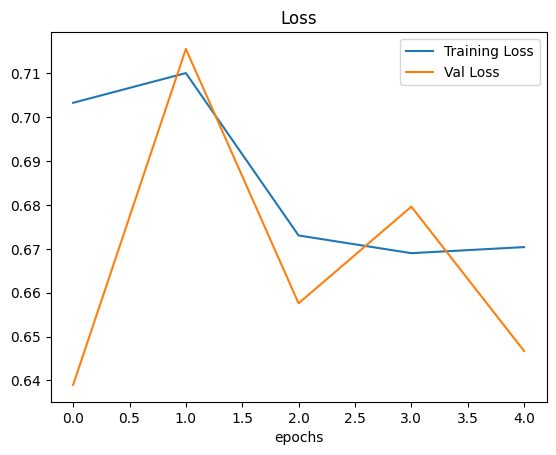

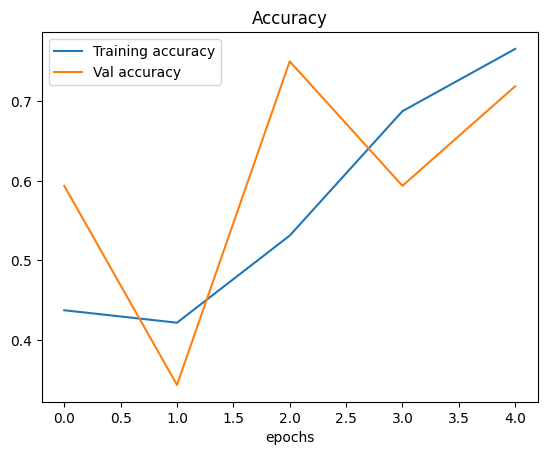

In [45]:
plot_loss_curves(history_5)

In [46]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [65]:
print('Augmented Training Image:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False)

print('Non-Augmented Training Image:')
train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'binary',
                                                shuffle = False)

print('Unchanged test images:')
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224, 224),
                                              batch_size = 32,
                                              class_mode = 'binary')

Augmented Training Image:
Found 1500 images belonging to 2 classes.
Non-Augmented Training Image:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [66]:
images, labels = train_data.__next__()
augmented_images, augmented_labels = train_data_augmented.__next__()

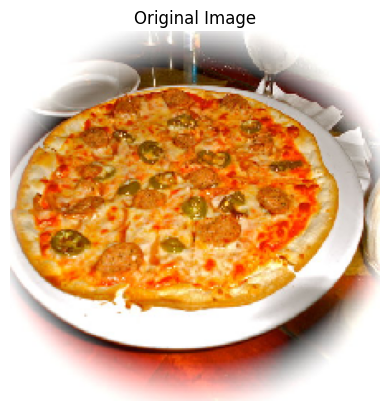

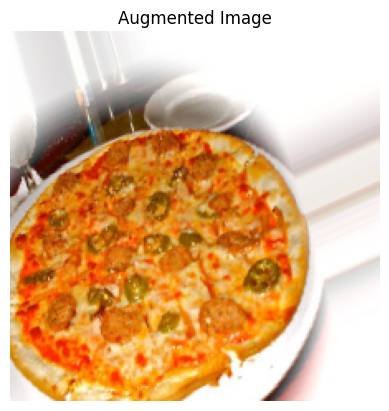

In [69]:
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented Image')
plt.axis(False);

In [71]:
model_6 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_6.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = math.ceil(len(train_data_augmented) / 32),
            validation_data = test_data,
            validation_steps = math.ceil(len(test_data) / 32))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5625 - loss: 0.8165 - val_accuracy: 0.6250 - val_loss: 0.6879
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 0.4818 - val_accuracy: 0.4375 - val_loss: 0.7937
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.3333 - loss: 0.8514 - val_accuracy: 0.5625 - val_loss: 0.7076
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6667 - loss: 0.6500 - val_accuracy: 0.4062 - val_loss: 0.7781
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7083 - loss: 0.6262 - val_accuracy: 0.6250 - val_loss: 0.6627


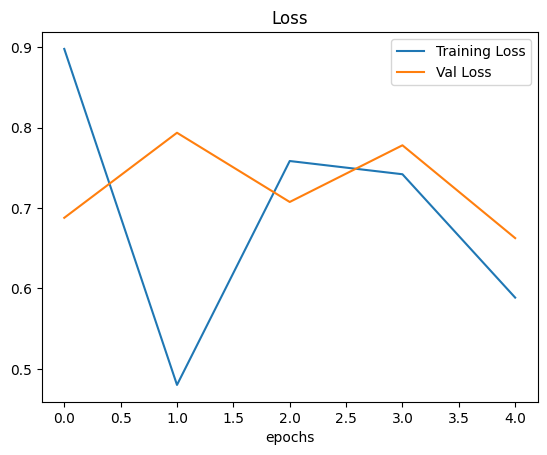

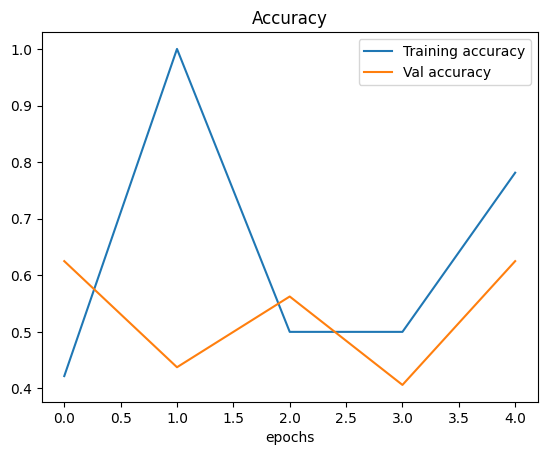

In [72]:
plot_loss_curves(history_6)

In [73]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                               batch_size = 32,
                                                               target_size = (224, 224),
                                                               class_mode = 'binary',
                                                               shuffle = True)

Found 1500 images belonging to 2 classes.


In [74]:
model_7 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_7.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = math.ceil(len(train_data_augmented_shuffled) / 32),
                        validation_data = test_data,
                        validation_steps = math.ceil(len(test_data) / 32))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4688 - loss: 0.6930 - val_accuracy: 0.4375 - val_loss: 0.6978
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4583 - loss: 0.6984 - val_accuracy: 0.4375 - val_loss: 0.6940
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5625 - loss: 0.6877 - val_accuracy: 0.7812 - val_loss: 0.6739
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5521 - loss: 0.6879 - val_accuracy: 0.6562 - val_loss: 0.6773
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.5833 - loss: 0.6864 - val_accuracy: 0.6250 - val_loss: 0.6747


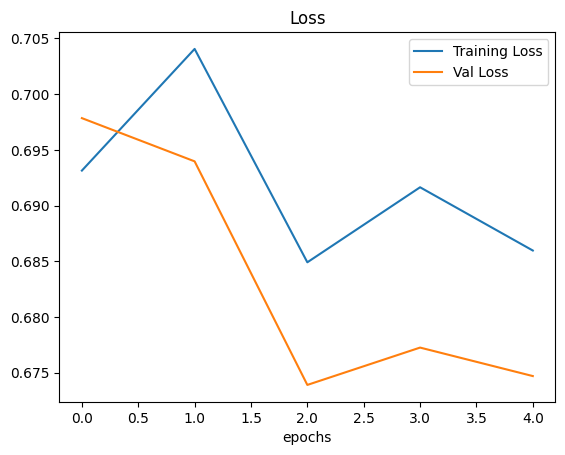

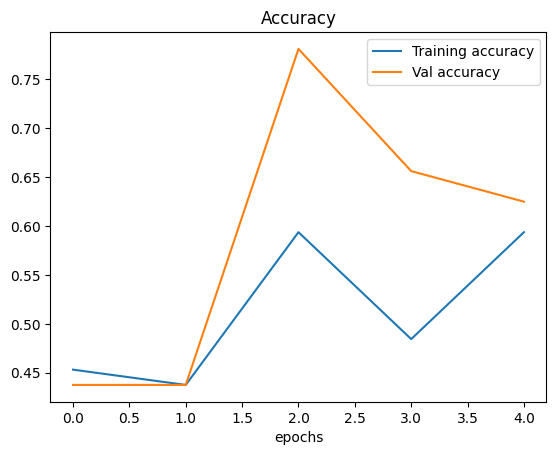

In [75]:
plot_loss_curves(history_7)

In [76]:
model_8 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_8.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffled,
            epochs = 5,
            steps_per_epoch = math.ceil(len(train_data_augmented_shuffled) / 32),
            validation_data = test_data,
            validation_steps = math.ceil(len(test_data) / 32))

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.4375 - loss: 0.6889 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5104 - loss: 0.7008 - val_accuracy: 0.5625 - val_loss: 0.6763
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5000 - loss: 0.6997 - val_accuracy: 0.3750 - val_loss: 0.7232
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.6042 - loss: 0.6627 - val_accuracy: 0.5625 - val_loss: 0.6708
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5431 - loss: 0.6820 - val_accuracy: 0.4688 - val_loss: 0.6947


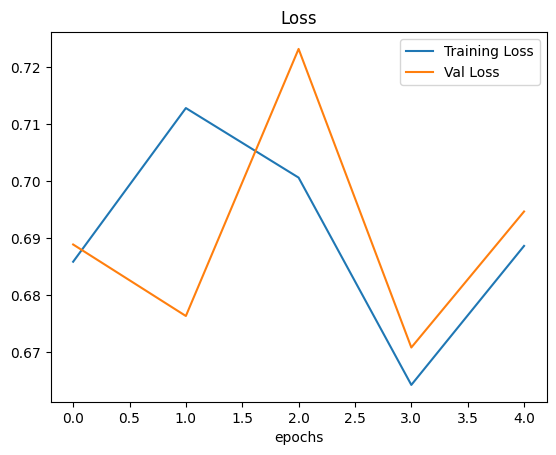

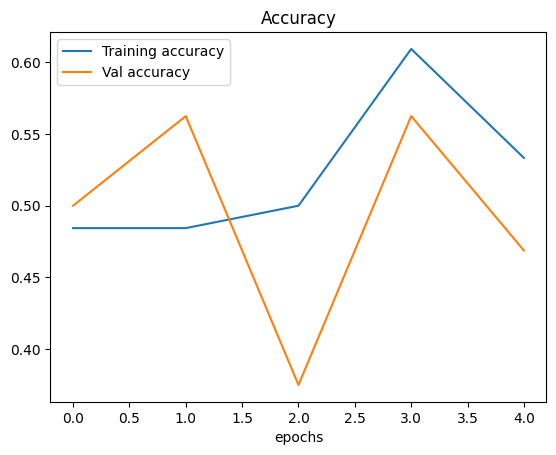

In [77]:
plot_loss_curves(history_8)

In [78]:
print(class_names)

['pizza' 'steak']


--2024-12-11 11:43:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2024-12-11 11:43:41 (39.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



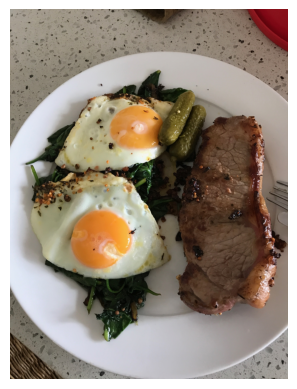

In [79]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [80]:
steak.shape

(4032, 3024, 3)

In [83]:
def load_and_pred_image(filename, img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [84]:
steak = load_and_pred_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [85]:
steak.shape

TensorShape([224, 224, 3])

In [86]:
steak = tf.expand_dims(steak, axis = 0)
steak.shape

TensorShape([1, 224, 224, 3])

In [87]:
pred = model_8.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


array([[0.45261073]], dtype=float32)

In [88]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [89]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [95]:
def pred_and_plot(model, filename, class_names):
  img = load_and_pred_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f'Prediction : {pred_class}')
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


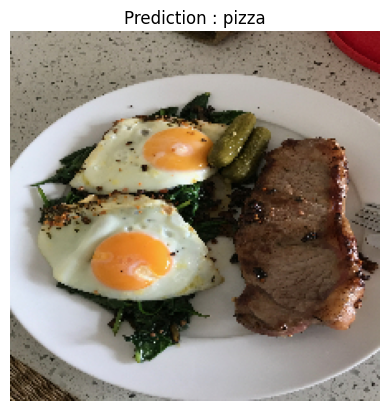

In [96]:
pred_and_plot(model_8, '03-steak.jpeg', class_names)

--2024-12-11 11:54:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2024-12-11 11:54:17 (57.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


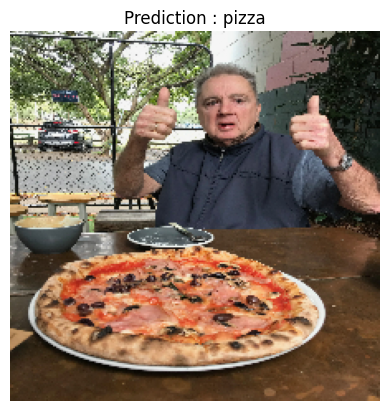

In [97]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)